In [1]:
#Download HSI Data
!wget http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat http://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat

--2023-04-03 13:48:02--  http://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Resolving www.ehu.eus (www.ehu.eus)... 158.227.0.65, 2001:720:1410::65
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat [following]
--2023-04-03 13:48:02--  https://www.ehu.eus/ccwintco/uploads/e/ee/PaviaU.mat
Connecting to www.ehu.eus (www.ehu.eus)|158.227.0.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34806917 (33M)
Saving to: ‘PaviaU.mat’

PaviaU.mat          100%[===================>]  33.19M  2.76MB/s    in 14s     

2023-04-03 13:48:17 (2.42 MB/s) - ‘PaviaU.mat’ saved [34806917/34806917]

URL transformed to HTTPS due to an HSTS policy
--2023-04-03 13:48:17--  https://www.ehu.eus/ccwintco/uploads/5/50/PaviaU_gt.mat
Reusing existing connection to www.ehu.eus:443.
HTTP request sent, awaiting response... 200 OK
Length: 11005 (11K)
S

In [2]:
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
import numpy as np    

In [3]:
from scipy.io import loadmat
def read_HSI():
  X = loadmat('PaviaU.mat')['paviaU']
  y = loadmat('PaviaU_gt.mat')['paviaU_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y
X, y = read_HSI()

X shape: (610, 340, 103)
y shape: (610, 340)


In [4]:
X = X.reshape(-1, X.shape[2])

In [5]:
y = np.reshape(y, (-1))
y.shape

(207400,)

In [8]:
import numpy as np
# Generate random indices
indices = np.random.permutation(len(X))
train_indices, test_indices = indices[:int(len(indices)*0.8)], indices[int(len(indices)*0.8):]
# Split the data
X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

In [ ]:
# import random
# indices_train = random.sample(range(len(X)), int(0.8*len(X)))
# indices_test = [i for i in range(len(X)) if i not in indices_train]

In [9]:
svm = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
svm.fit(X_train,y_train)
ypred = svm.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, ypred)
print("SVM accuracy:", acc)

SVM accuracy: 0.8330279652844744


In [11]:
print('Classification report:\n', classification_report(y_test, ypred,zero_division=0))

Classification report:
               precision    recall  f1-score   support

           0       0.84      0.97      0.90     32862
           1       0.00      0.00      0.00      1362
           2       0.71      0.61      0.66      3717
           3       0.76      0.03      0.06       437
           4       0.73      0.08      0.14       651
           5       0.85      0.90      0.87       260
           6       1.00      0.00      0.00       997
           7       0.70      0.57      0.63       256
           8       0.83      0.01      0.01       743
           9       0.00      0.00      0.00       195

    accuracy                           0.83     41480
   macro avg       0.64      0.32      0.33     41480
weighted avg       0.80      0.83      0.79     41480



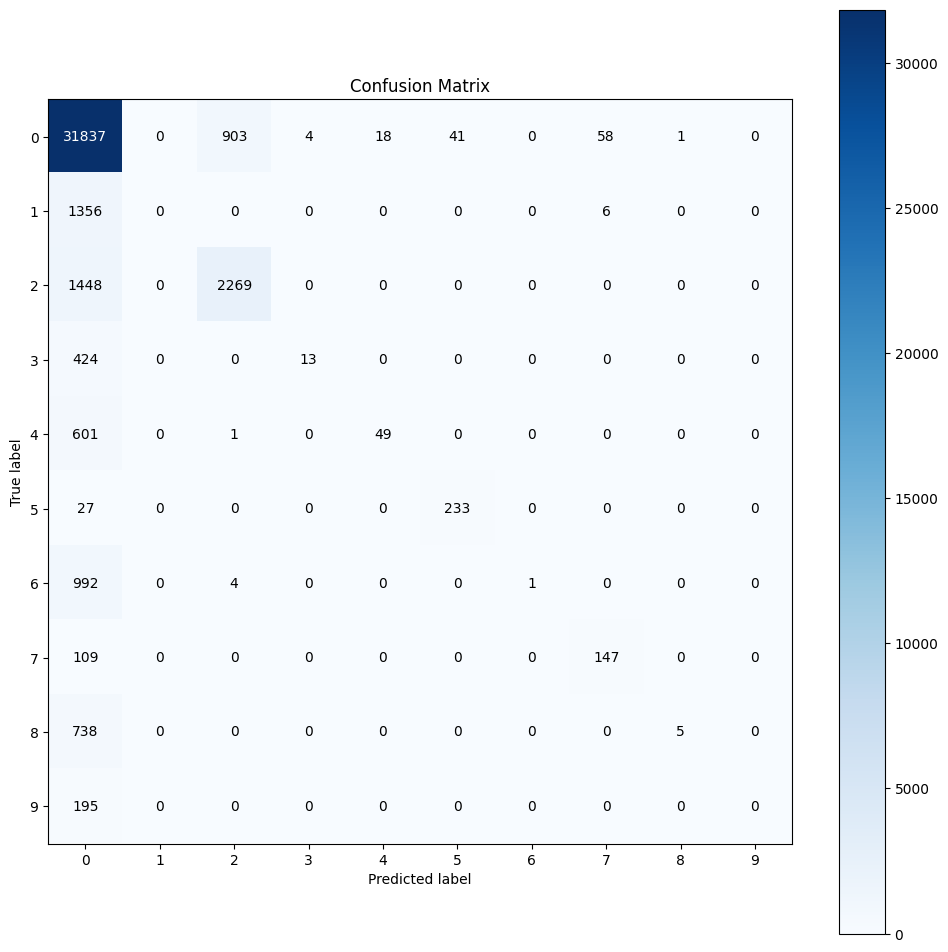

In [12]:
! pip install -q scikit-plot
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(
    y_test, 
    ypred,
    figsize=(12,12));

In [23]:
# !pip install tqdm
from tqdm import tqdm
pre = ypred                 

clmap = np.zeros(X.shape[0], dtype=int)
for i in tqdm(range(len(train_indices))):
    clmap[train_indices[i]] = y[train_indices[i]]

for i in tqdm(range(len(test_indices))):
    clmap[test_indices[i]] = pre[i]

100%|██████████| 41480/41480 [00:00<00:00, 914609.33it/s]


In [14]:
X.shape, y.shape

((207400, 103), (207400,))

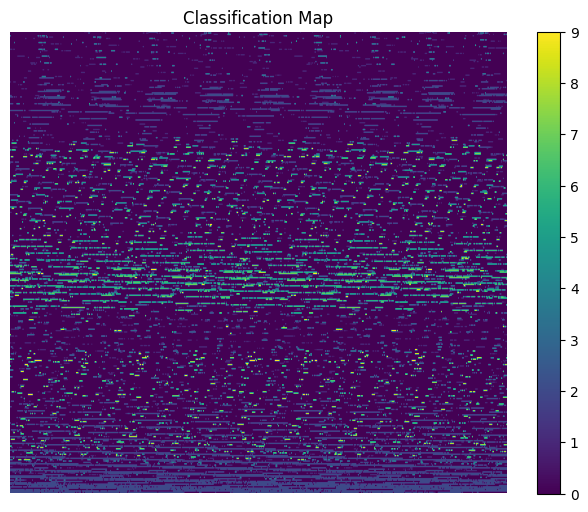

In [19]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((340, 610)), cmap='viridis', aspect='auto')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map')
plt.savefig('Classification_map.png')
plt.show()